## 读取客户流失数据

In [82]:
import pandas
df = pandas.read_csv('Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


## 数据前处理

In [83]:
df = df.ix[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.ix[:,-1]
X = df.ix[:,:-1]

In [86]:
#y.shape
#X.shape

## 区分训练与测试数据集

In [87]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state = 123)

In [89]:
train_X.shape
test_X.shape

(1100, 16)

## 使用决策树建立分类模型

In [107]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [108]:
predicted  = clf.predict(test_X)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
import numpy
numpy.sum(test_y == predicted) / len(test_y)

0.89363636363636367

## 产生Confusion Matrix 以及其它评估指标

In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predicted)

0.89363636363636367

In [111]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(test_y, predicted)
m

array([[924,  26],
       [ 91,  59]])

In [112]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predicted))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94       950
          1       0.69      0.39      0.50       150

avg / total       0.88      0.89      0.88      1100



## 使用ROC Curve 比较模型

In [113]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [114]:
from sklearn.svm import SVC
clf2 = SVC(probability=True, kernel='linear', cache_size=7000, max_iter=10000)
clf2.fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=10000, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [115]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


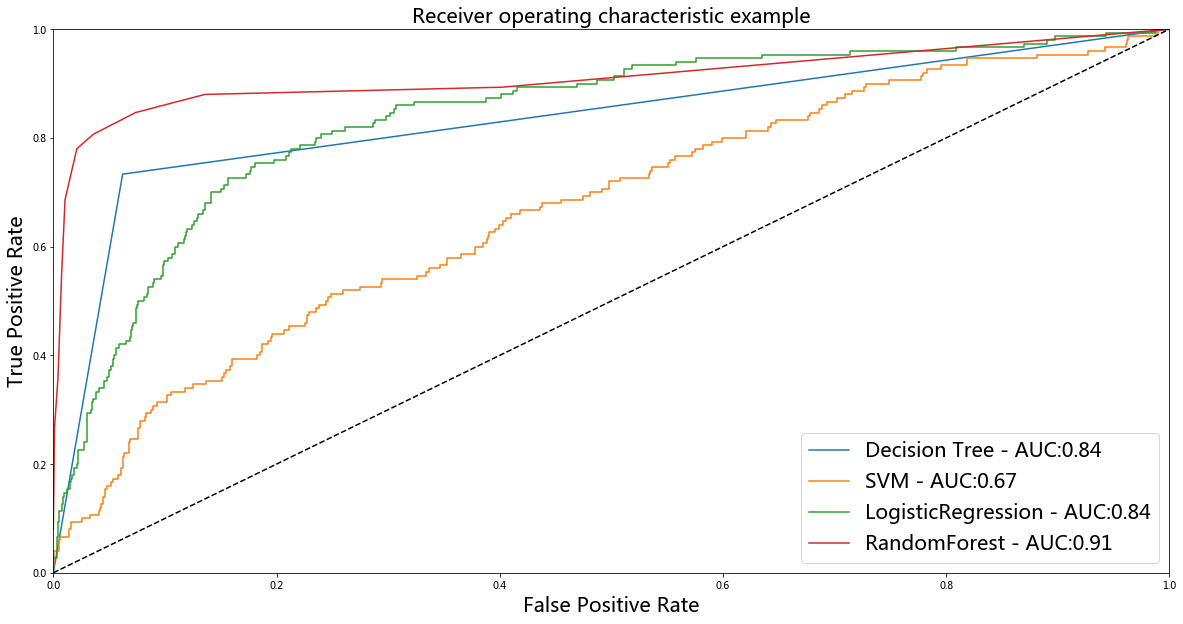

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3, clf4], ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

In [122]:
a = [2,5,4,1,3]
b = numpy.array(a)
b.argsort()

array([3, 0, 4, 2, 1], dtype=int64)

In [127]:
#clf1.feature_importances_.argsort()
#train_X.columns
#clf1.feature_importances_.argsort()[::-1]
train_X.columns[clf4.feature_importances_.argsort()[::-1]]

Index(['total_day_minutes', 'total_day_charge',
       'number_customer_service_calls', 'international_plan',
       'total_eve_charge', 'total_eve_minutes', 'total_intl_calls',
       'total_night_minutes', 'total_night_charge', 'total_intl_charge',
       'number_vmail_messages', 'total_day_calls', 'total_eve_calls',
       'total_intl_minutes', 'total_night_calls', 'voice_mail_plan'],
      dtype='object')

## 评估特征重要性

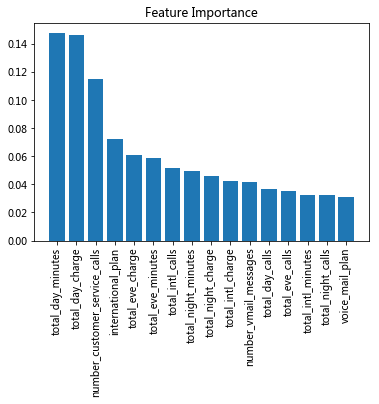

In [128]:
import matplotlib.pyplot as plt
importance = clf4.feature_importances_
names = train_X.columns
plt.title('Feature Importance')
plt.bar(range(0, len(names)), importance[importance.argsort()[::-1]])
plt.xticks(range(0,len(names)), names[importance.argsort()[::-1]], rotation=90)
plt.show()